In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from sklearn.linear_model import LinearRegression

In [2]:
resize = 1
plt.rcParams.update({
    "figure.figsize": (6.4*resize, 4.0*resize), # (6.4, 4.8)[4:3] -> (6.4, 4.0)[8:5]
    "font.sans-serif": ["Helvetica", "Nimbus Sans", "Arial", "DejaVu Sans"],
})

In [3]:
bs = np.arange(1, 501)

pt_epoch_true_val = np.load('../ver_conf/scp/pt_train_time_1_501_1.npy')
tf_epoch_true_val = np.load('../ver_conf/scp/tf_train_time_1_501_1.npy')

pt_batch_true_val = pt_epoch_true_val / np.ceil(50000/bs)
tf_batch_true_val = tf_epoch_true_val / np.ceil(50000/bs)

In [4]:
pt_reg_model = LinearRegression().fit(bs.reshape(-1,1), pt_batch_true_val)
tf_reg_model = LinearRegression().fit(bs.reshape(-1,1), tf_batch_true_val)

In [5]:
pt_batch_predict_val = pt_reg_model.predict(bs.reshape(-1,1))
tf_batch_predict_val = tf_reg_model.predict(bs.reshape(-1,1))

pt_epoch_predict_val = pt_batch_predict_val * np.ceil(50000/bs)
tf_epoch_predict_val = tf_batch_predict_val * np.ceil(50000/bs)

In [6]:
def get_csv():
    time_an_epoch = []
    time_an_epoch.append(np.arange(1, 501))
    time_an_epoch.append(pt_epoch_true_val)
    time_an_epoch.append(pt_epoch_predict_val)
    time_an_epoch.append(tf_epoch_true_val)
    time_an_epoch.append(tf_epoch_predict_val)
    time_an_epoch = np.array(time_an_epoch).T

    time_a_batch = []
    time_a_batch.append(np.arange(1, 501))
    time_a_batch.append(pt_batch_true_val)
    time_a_batch.append(pt_batch_predict_val)
    time_a_batch.append(tf_batch_true_val)
    time_a_batch.append(tf_batch_predict_val)
    time_a_batch = np.array(time_a_batch).T
    
    np.savetxt('train_time_an_epoch.csv', time_an_epoch, delimiter=',')
    np.savetxt('train_time_a_batch.csv', time_a_batch, delimiter=',')

#get_csv()

In [7]:
#DPI = 300
SAVE = True
save_path = './figure'

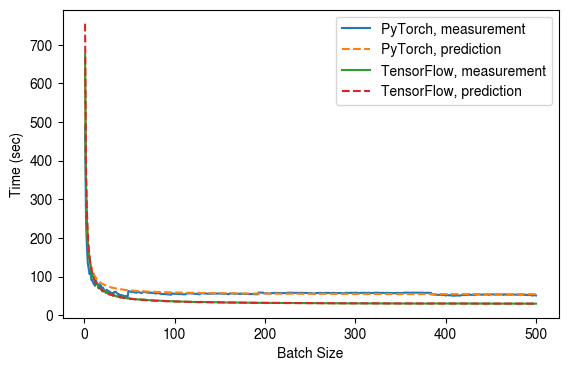

In [8]:
plt.figure()#(dpi=DPI)
plt.plot(
    bs,
    pt_epoch_true_val,
    label='PyTorch, measurement',
    #linewidth=1,
)
plt.plot(
    bs,
    pt_epoch_predict_val,
    label='PyTorch, prediction',
    linestyle='--',
    #linewidth=1,
)
plt.plot(
    bs,
    tf_epoch_true_val,
    label='TensorFlow, measurement',
    #linewidth=1,
)
plt.plot(
    bs,
    tf_epoch_predict_val,
    label='TensorFlow, prediction',
    linestyle='--',
    #linewidth=1,
)
#plt.title('Training Time an Epoch')
plt.xlabel('Batch Size')
plt.ylabel('Time (sec)')
plt.legend()
if SAVE:
    plt.savefig(f"{save_path}/train_time_an_epoch.pdf", bbox_inches="tight")
else:
    plt.show()

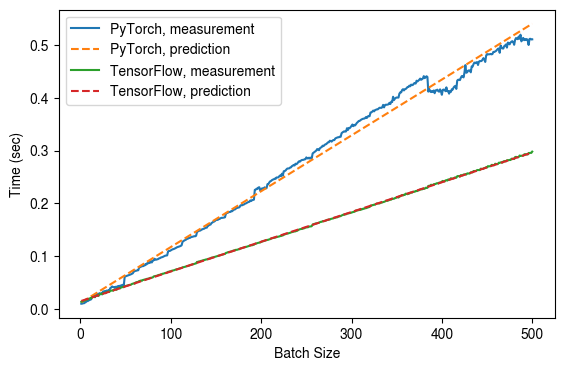

In [9]:
plt.figure()#(dpi=DPI)
plt.plot(
    bs,
    pt_batch_true_val,
    label='PyTorch, measurement',
    #linewidth=1,
)
plt.plot(
    bs,
    pt_batch_predict_val,
    label='PyTorch, prediction',
    linestyle='--',
    #linewidth=1,
)
plt.plot(
    bs,
    tf_batch_true_val,
    label='TensorFlow, measurement',
    #linewidth=1,
)
plt.plot(
    bs,
    tf_batch_predict_val,
    label='TensorFlow, prediction',
    linestyle='--',
    #linewidth=1,
)
#plt.title('Training Time a Batch')
plt.xlabel('Batch Size')
plt.ylabel('Time (sec)')
plt.legend()
if SAVE:
    plt.savefig(f"{save_path}/train_time_a_batch.pdf", bbox_inches="tight")
else:
    plt.show()

In [10]:
predict_over_true = tf_batch_predict_val / tf_batch_true_val
temp = np.abs(predict_over_true-1)
print(np.max(temp), np.argmax(temp), scipy.stats.gmean(temp))

0.12445653233419529 1 0.003911811061898808


In [11]:
bbss = 500
datasize = 13125
tf_batch_true_val[bbss-1]*datasize/bbss

np.float64(7.8208026856184)